- Ignacio David Vázquez Pérez
- 218292866
- (2022B) Sem. de Sol. de Problemas de Inteligencia Artificial II
- D05 (2022B)

In [1]:
import numpy as np
import random
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns; sns.set()
from sklearn import metrics 
from sklearn.model_selection import KFold # import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeavePOut
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
# from mlxtend.evaluate import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import multilabel_confusion_matrix

In [2]:
def MLP_binary_classification_2d(X,Y,net):
    plt.figure()
    for i in range(X.shape[1]):
        if Y[0,i]==0:
            plt.plot(X[0,i], X[1,i], '.r')
        else:
            plt.plot(X[0,i], X[1,i], '.b')
    xmin, ymin=np.min(X[0,:])-0.5, np.min(X[1,:])-0.5
    xmax, ymax=np.max(X[0,:])+0.5, np.max(X[1,:])+0.5
    xx, yy = np.meshgrid(np.linspace(xmin,xmax, 100), 
                         np.linspace(ymin,ymax, 100))
    data = [xx.ravel(), yy.ravel()]
    zz = net.predict(data)
    zz = zz.reshape(xx.shape)
    plt.contourf(xx,yy,zz, alpha=0.8, 
                 cmap=plt.cm.RdBu)
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.grid()
    plt.show()
    

# Ejercicio 1_4

Iris es el género de una planta herbácea con flores que se utilizan en decoración. Dentro
de este género existen muy diversas especies entre las que se han estudiado la Iris setosa, la Iris versicolor y la Iris virginica.

Las tres especies se pueden diferenciar en base a las dimensiones de sus pétalos y sépalos. Se ha
recopilado la información de 50 plantas de cada especie y se han almacenado en el archivo irisbin.csv.
Dichas mediciones están en centímetros junto con un código binario que indica la especie a la que
pertenece [-1, -1, 1] = setosa, [-1, 1, -1] = versicolor, [1, -1, -1] = virginica, se muestra la distribución de los datos contenidos en el archivo. Se debe crear un programa capaz de clasificar
automáticamente los datos de 150 patrones usando un perceptrón multicapa. Es recomendable
considerar 80% de los datos para entrenamiento y 20% para generalización.

Con la estructura optima de la red, se deben validar los resultados usando lo métodos leave-k-out y leave-one-out con un perceptrón multicapa como clasificador. Se debe estimar el error esperado de clasificación, el promedio y la desviación estándar de ambos métodos.

## Dataset

In [49]:
irisbin_dataset = np.genfromtxt('irisbin.csv', delimiter=',')

In [50]:
X = irisbin_dataset[:,0:4]
y = irisbin_dataset[:,4:]

In [51]:
df_tmp = pd.DataFrame(y, columns = ['class1','class2','class3'])
df_tmp['merge'] = df_tmp[df_tmp.columns[1:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
yle = LabelEncoder()
df_tmp['merge'] = yle.fit_transform(df_tmp['merge'])
y = df_tmp['merge'].values

In [52]:
X.shape

(150, 4)

In [53]:
y.shape

(150,)

In [54]:
X[:10,:]

array([[4.5, 2.3, 1.3, 0.3],
       [5.1, 3.3, 1.7, 0.5],
       [7.2, 3. , 5.8, 1.6],
       [5.5, 4.2, 1.4, 0.2],
       [6.7, 3.1, 4.7, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.3, 1.4, 0.2],
       [6.7, 3.3, 5.7, 2.1]])

### Se normalizan los datos

In [55]:
scaler = StandardScaler()
scaler.fit(X)
X_scaler = scaler.transform(X)
X_scaler[:10,:]

array([[-1.62292232, -1.73079506, -1.20477011, -1.05115083],
       [-0.84474966,  0.35450019, -0.98743335, -0.78704258],
       [ 1.87885466, -0.27108838,  1.24026844,  0.66555279],
       [-0.32596788,  2.23126592, -1.15043592, -1.18320495],
       [ 1.23037744, -0.06255886,  0.64259235,  0.53349866],
       [ 0.84129111, -0.06255886,  1.07726587,  0.92966103],
       [ 0.45220478, -0.27108838,  0.75126073,  0.92966103],
       [-0.71505421,  0.56302972, -1.15043592, -1.18320495],
       [-0.9744451 ,  0.35450019, -1.15043592, -1.18320495],
       [ 1.23037744,  0.35450019,  1.18593425,  1.32582341]])

### Se realiza la técnica de reducción de dimensionalidad a 2 componentes

In [56]:
pca = PCA(n_components=2)
pca.fit(X_scaler)
X_2dim = pca.transform(X_scaler)
X_2dim[:10,:]

array([[-1.66269754,  2.3014299 ],
       [-1.5522715 ,  0.08128878],
       [ 2.13274282, -0.6149128 ],
       [-2.1176468 , -1.82020295],
       [ 1.32239143, -0.50675546],
       [ 1.60591768, -0.34473107],
       [ 1.27417771,  0.01695567],
       [-1.86488766, -0.15355997],
       [-1.94023969,  0.14854956],
       [ 1.98120054, -0.90047924]])

### Etiquetas

In [57]:
y[:10]

array([1, 1, 0, 1, 2, 0, 0, 1, 1, 0])

<AxesSubplot:>

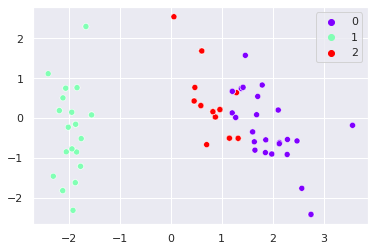

In [58]:
sns.scatterplot(x=X_2dim[:,0], y=X_2dim[:,1], hue= y, palette='rainbow')

______________________________________

## Perceptrón Multicapa

### Se separan los datos en entrenamiento y validación

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_2dim, y, test_size=0.20, shuffle= True)

In [31]:
X_train.shape

(2, 120)

In [32]:
X_test.shape

(2, 30)

In [33]:
y_train.shape

(1, 120)

In [34]:
y_test.shape

(1, 30)

## LeaveOneOut

In [19]:
list_error_porcentual = []

list_y_pred, list_y_test = [], [] 

loo = LeaveOneOut()
for train_index, test_index in loo.split(X_2dim):
    # index
    X_train, X_test = X_2dim[train_index], X_2dim[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # train
    mlp_clf = MLPClassifier(
        hidden_layer_sizes=(100,), max_iter=100, alpha=1e-4,solver='sgd', tol=1e-4,learning_rate_init=.1)
    mlp_clf.fit(X_train, y_train)
    # test
    y_pred = mlp_clf.predict(X_test)
    # error
    list_y_pred.append(y_pred)
    list_y_test.append(y_test)

print('Accuracy: {:.2f}'.format(accuracy_score(list_y_test, list_y_pred)))
print(classification_report(list_y_test, list_y_pred))


Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        45
           1       1.00      1.00      1.00        62
           2       0.98      0.98      0.98        43

    accuracy                           0.99       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.99      0.99      0.99       150



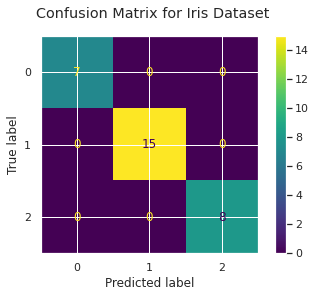

In [27]:
fig = plot_confusion_matrix(mlp_clf, X_test, y_test, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Iris Dataset")
plt.show()

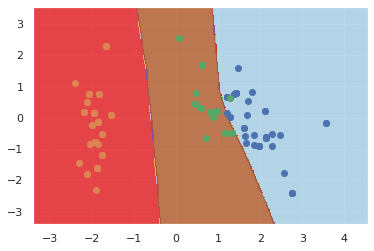

In [28]:
MLP_binary_classification_2d(mlp_clf, X_test, y_test)


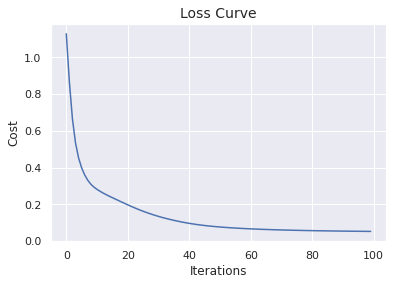

In [29]:

plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

## LeavePOut

In [21]:
list_error_porcentual = []
list_y_pred, list_y_test = [], [] 

lpo = LeavePOut(2)
for train_index, test_index in lpo.split(X_2dim):
    # index
    X_train, X_test = X_2dim[train_index], X_2dim[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # train
    mlp_clf = MLPClassifier(
        hidden_layer_sizes=(100,), max_iter=100, alpha=1e-4,solver='sgd', tol=1e-4,learning_rate_init=.1)
    mlp_clf.fit(X_train, y_train)
    # test
    y_pred = mlp_clf.predict(X_test)
    # error
    list_y_pred.append(y_pred)
    list_y_test.append(y_test)


In [63]:
# cross_val_score(mlp_clf, X_train, y_train, cv=5)
# print('Accuracy: {:.2f}'.format(accuracy_score(list_y_test, list_y_pred)))
print(classification_report(np.array(list_y_test)[:,1], np.array(list_y_test)[:,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3480
           1       1.00      1.00      1.00      4663
           2       1.00      1.00      1.00      3032

    accuracy                           1.00     11175
   macro avg       1.00      1.00      1.00     11175
weighted avg       1.00      1.00      1.00     11175



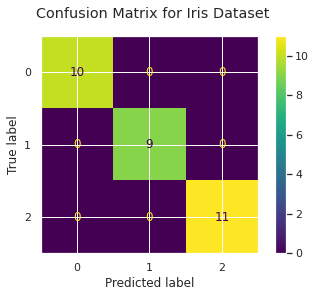

In [40]:
fig = plot_confusion_matrix(mlp_clf, X_test, y_test, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Iris Dataset")
plt.show()

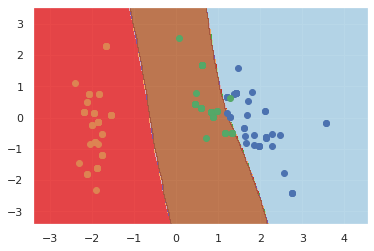

In [22]:
MLP_binary_classification_2d(mlp_clf, X_2dim, y)


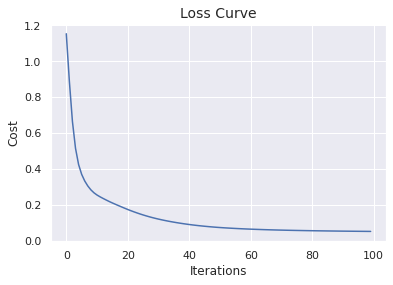

In [64]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

## Conclusiones

En esta práctica pude profundizar sobre los diferentes métodos de distribución de los datos para poder evitar el sobre entrenamiento, en lugar de entrenar al modelo con el set de datos en su orden original. Ya que al dividir los datos aleatoriamente en subconjuntos para promediar sus diferentes resultados. En este experimento el LeaveKOut tuvo mayor precisión en las 3 clases del dataset. Cuando se realizan estas técnicas el modelo adquiere unan mayor robustez, ya que se le al entrenar mayor variabilidad de los datos. 

Un factor importante al elegir entre los métodos de validación cruzada k-fold y LOO es el tamaño del conjunto de datos.
Ya que si se llega a utilizar uno muy grande el algoritmo de repeated-k-fold puede ser mejor opcion, porque es menos costoso computacionalmente y las muestras de prueba son suficientes para tener un resultado significativo. Y Leave-P-Out con un tamaño pequeño puede ser el más apropiado, ya que se utilizarán más muestras de entrenamiento en cada iteración.

Además se graficaron las curvas de pérdida que nos brindan una mejor comprensión de cómo cambia el rendimiento del aprendizaje a lo largo de la cantidad de épocas y nos ayudan a diagnosticar cualquier problema con el aprendizaje que pueda conducir a un modelo inadecuado o excesivo.